##### Basic image processing with in built functions

```python

from images import Image
#  Or
# from PIL import Image

# Loads and returns an image from a file with the given filename. Raises an error if the filename is not found or the file is not a GIF file.
i = Image(filename)

# Creates and returns a blank image with the given dimensions. The color of each pixel is transparent, and the filename is the empty string.
i = Image(width, height)

# Returns the width of i in pixels.
i.getWidth()
# Returns the height of i in pixels.
i.getHeight()

# Returns a tuple of integers representing the RGB values of the pixel at position (x, y).
i.getPixel (x, y)

# Replaces the RGB value at the position (x, y) with the RGB value given by the tuple (r. 9, b).
i.setPixel (x, y, (r, g, b))

# Displays i in a window.
# The user must close the window to return control to the method's caller.
i.draw()

# Returns a copy of i.
i.clone()

# Saves i under its current filename. If i does not yet have a filename, save does nothing.
i.save()
# Saves i under filename. Automatically adds a .gif extension if filename does not contain it.
i.save(filename)

```

In [3]:
from PIL import Image

In [29]:
i = Image.open('cat.jpg')
i.size

(640, 853)

In [30]:
def average(triple):
    a, b, c = triple
    return (a+b+c)//3

In [31]:
def greyscale(triple):
    r, g, b = triple
    return(int(r * 0.299), int(g * 0.587), int(b * 0.114))

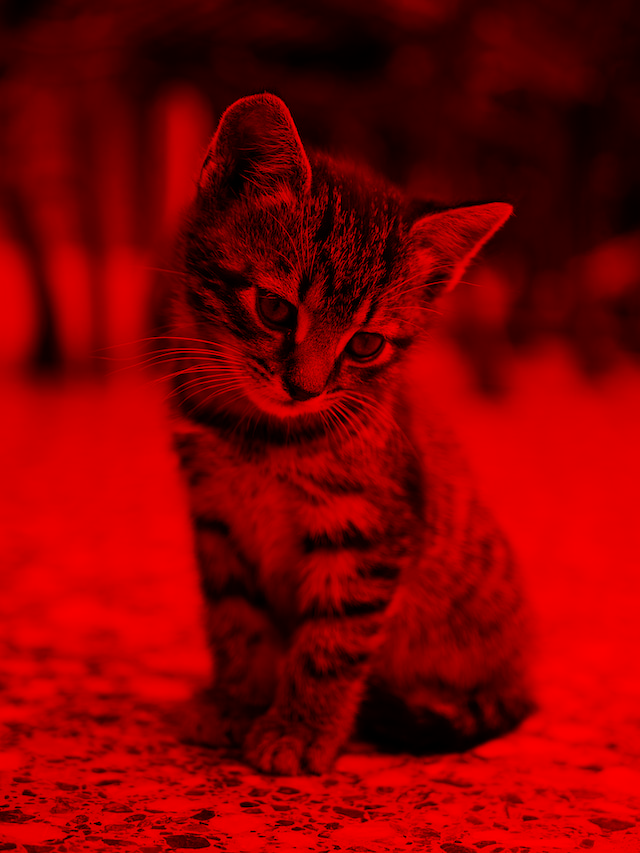

In [33]:
for y in range(i.height):
    for x in range(i.width):
        px = i.getpixel((x, y))
        avg = average(px)
        i.putpixel((x, y), avg)

i

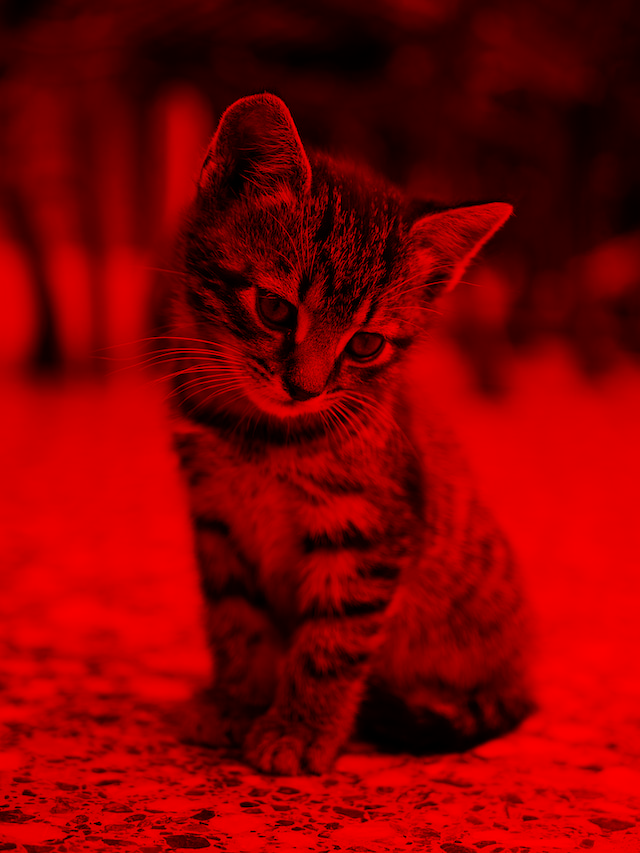

In [35]:
# for y in range(i.height):
#     for x in range(i.width):
#         px = i.getpixel((x, y))
#         avg = greyscale(px)
#         i.putpixel((x, y), avg)

i.convert('L')
i